In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import FE_DAE as fe
from FE_DAEsolver import *
from data_generator import *
import importlib
import cv2

## Generate Data

In [3]:
torch.cuda.set_device(1) #use GPU 1

In [4]:
import torchvision
import torchvision.datasets as datasets
#Download MNIST
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)

#Load
#mnist_trainset = datasets.MNIST(root='./data', train=True, download=False, transform=None)

In [5]:
torch.set_default_tensor_type('torch.cuda.FloatTensor')
torch.cuda.set_device(0) #use GPU 1

In [6]:
data_load = torch.utils.data.DataLoader(mnist_trainset, shuffle = True)

In [289]:
mov_len = 3

In [290]:
#Random shapes

images = np.array([shape_gen(28,10,16) for i in range(5000)])
M = rand_trans(images, 1, 3)
data_mov = torch.from_numpy(image_gen(images,M, mov_len)).float().cuda()
# data_mov = data_mov/255

In [291]:
#MNIST

# images = data_load.dataset.data[0:1000].numpy()
# M = rand_trans(images, 1, 3)
# data_mov = torch.from_numpy(image_gen(images,M, mov_len)).float().cuda()
# data_mov = data_mov/255

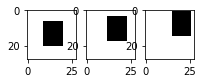

In [292]:
ix = 19
fig = plt.figure(figsize = (mov_len,5))
for i in range(mov_len):
    fig.add_subplot(1,mov_len,i+1)
    plt.imshow(data_mov[ix,i,:,:].cpu().numpy(),cmap='Greys')
# plt.savefig('MNIST sequence')

## Simulate FE V1 DAE

In [293]:
importlib.reload(fe)

<module 'FE_DAE' from '/home/shazoop/form-and-motion/EE219A/FE_DAE.py'>

In [294]:
main = fe.FE_V1(beta = .5e-06,gamma = .5e-06,eta=1e-06,theta=1.5e-06) #beta = 10,gamma = 10,eta=20,theta=30
main.summary()

['Layer 1 has 25 units per layer, depth 16, and RF size: 12 by 12',
 'Layer 2 has 9 units per layer, depth 16, and RF size: 3 by 3',
 'Layer 3 has 4 units per layer, depth 32, and RF size: 2 by 2',
 'Time step: 0.05 s']

In [295]:
main.print_parms()

{'pixel dim/pixDim': 28,
 'RF 1 dim/n1': 12,
 'layer1 depth/d1': 16,
 'RF 2 dim/n2': 3,
 'layer 2 depth/d2': 16,
 'RF 3 dim/n3': 2,
 'layer 3 depth/d3': 32,
 'L1Hebb/beta': 5e-07,
 'L1AntiH/alpha': 0.01,
 'L1thresh/gamma': 5e-07,
 'L2Hebb/eta': 1e-06,
 'L3Hebb/theta': 1.5e-06,
 'L1prob/p': 0.125,
 'L1 stride/S1': 4,
 'L2 stride/S2': 1,
 'L3 stride/S3': 1,
 'time step/h': 0.05}

In [306]:
x = main.x_init()
y,W_y,Q,t,z,W_z,z_bar,v,W_v,v_bar = x

In [307]:
trainSteps = 7500
for train in range(trainSteps):
    input_mov = data_mov[int(np.random.randint(0,data_mov.size(0),1))] #select a random movie sequence
    x = FE_movie(main,input_mov, 7, W_y = W_y, Q = Q, t = t, W_z = W_z,W_v = W_v)
    y,W_y,Q,t,z,W_z,z_bar,v,W_v,v_bar = x
    if train % 100 == 0:
        print('Step: %s' % train)
    else:
        print('Step: %s' % train, end = '\r')

Step: 0
Step: 100
Step: 200
Step: 300
Step: 400
Step: 500
Step: 600
Step: 700
Step: 800
Step: 900
Step: 1000
Step: 1100
Step: 1200
Step: 1300
Step: 1400
Step: 1500
Step: 1600
Step: 1700
Step: 1800
Step: 1900
Step: 2000
Step: 2100
Step: 2200
Step: 2400
Step: 2500
Step: 2600
Step: 2700
Step: 2800
Step: 2900
Step: 3000
Step: 3100
Step: 3200
Step: 3300
Step: 3400
Step: 3500
Step: 3600
Step: 3700
Step: 3800
Step: 3900
Step: 4000
Step: 4100
Step: 4200
Step: 4300
Step: 4400
Step: 4500
Step: 4600
Step: 4700
Step: 4800
Step: 4900
Step: 5000
Step: 5100
Step: 5200
Step: 5300


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [308]:
x_final = x
yF,W_yF,QF,tF,zF,W_zF,z_barF,vF,W_vF,v_barF = x_final


In [309]:
yF

tensor([[[2.2208e-01, 1.0177e-07, 1.7364e-11, 2.2240e-01, 2.2150e-01,
          1.7364e-11, 7.3798e-04, 2.2197e-01, 1.7364e-11, 1.7365e-11,
          1.7366e-11, 1.7364e-11, 1.7364e-11, 1.7364e-11, 2.2211e-01,
          1.7364e-11],
         [1.3274e-01, 1.3274e-01, 1.9838e-11, 1.2713e-01, 1.3256e-01,
          1.3295e-01, 1.3292e-01, 3.1099e-07, 5.7595e-05, 1.0573e-07,
          1.1137e-01, 1.9838e-11, 2.0256e-02, 1.3386e-01, 1.9838e-11,
          4.3901e-03],
         [1.9134e-01, 9.9910e-06, 2.2104e-01, 7.7338e-05, 2.2886e-11,
          1.3421e-01, 6.3108e-09, 4.7740e-03, 1.4014e-11, 2.4144e-11,
          4.3183e-11, 2.1413e-01, 1.4783e-01, 3.5817e-07, 3.6555e-05,
          1.7583e-01],
         [1.9148e-10, 4.4443e-11, 4.1964e-09, 1.3901e-11, 1.9012e-11,
          1.1022e-07, 3.4589e-11, 1.5117e-11, 3.4031e-11, 2.3800e-10,
          3.2518e-04, 2.7355e-10, 2.1763e-11, 8.0635e-09, 1.6025e-09,
          1.9328e+00],
         [3.2258e-02, 3.2258e-02, 3.2258e-02, 3.2258e-02, 3.2258e-02

In [300]:
#Shapes
# torch.save(x_final, 'Shape_parms')
# x_final = torch.load('Shape_parms')

#MNIST
# torch.save(x_final2,'Model1_results')
# x_final = torch.load('Model1_results')


yF,W_yF,QF,tF,zF,W_zF,z_barF,vF,W_vF,v_barF = x_final


In [301]:
input_mov = data_mov[9]

In [302]:
data_mov.shape

torch.Size([5000, 3, 28, 28])

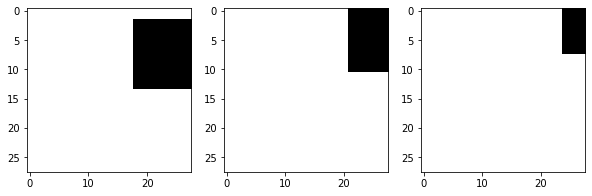

In [303]:
fig = plt.figure(figsize = (10,5))
for i in range(mov_len):
    fig.add_subplot(1,mov_len,i+1)
    plt.imshow(input_mov[i,:,:].cpu().numpy(),cmap='Greys')

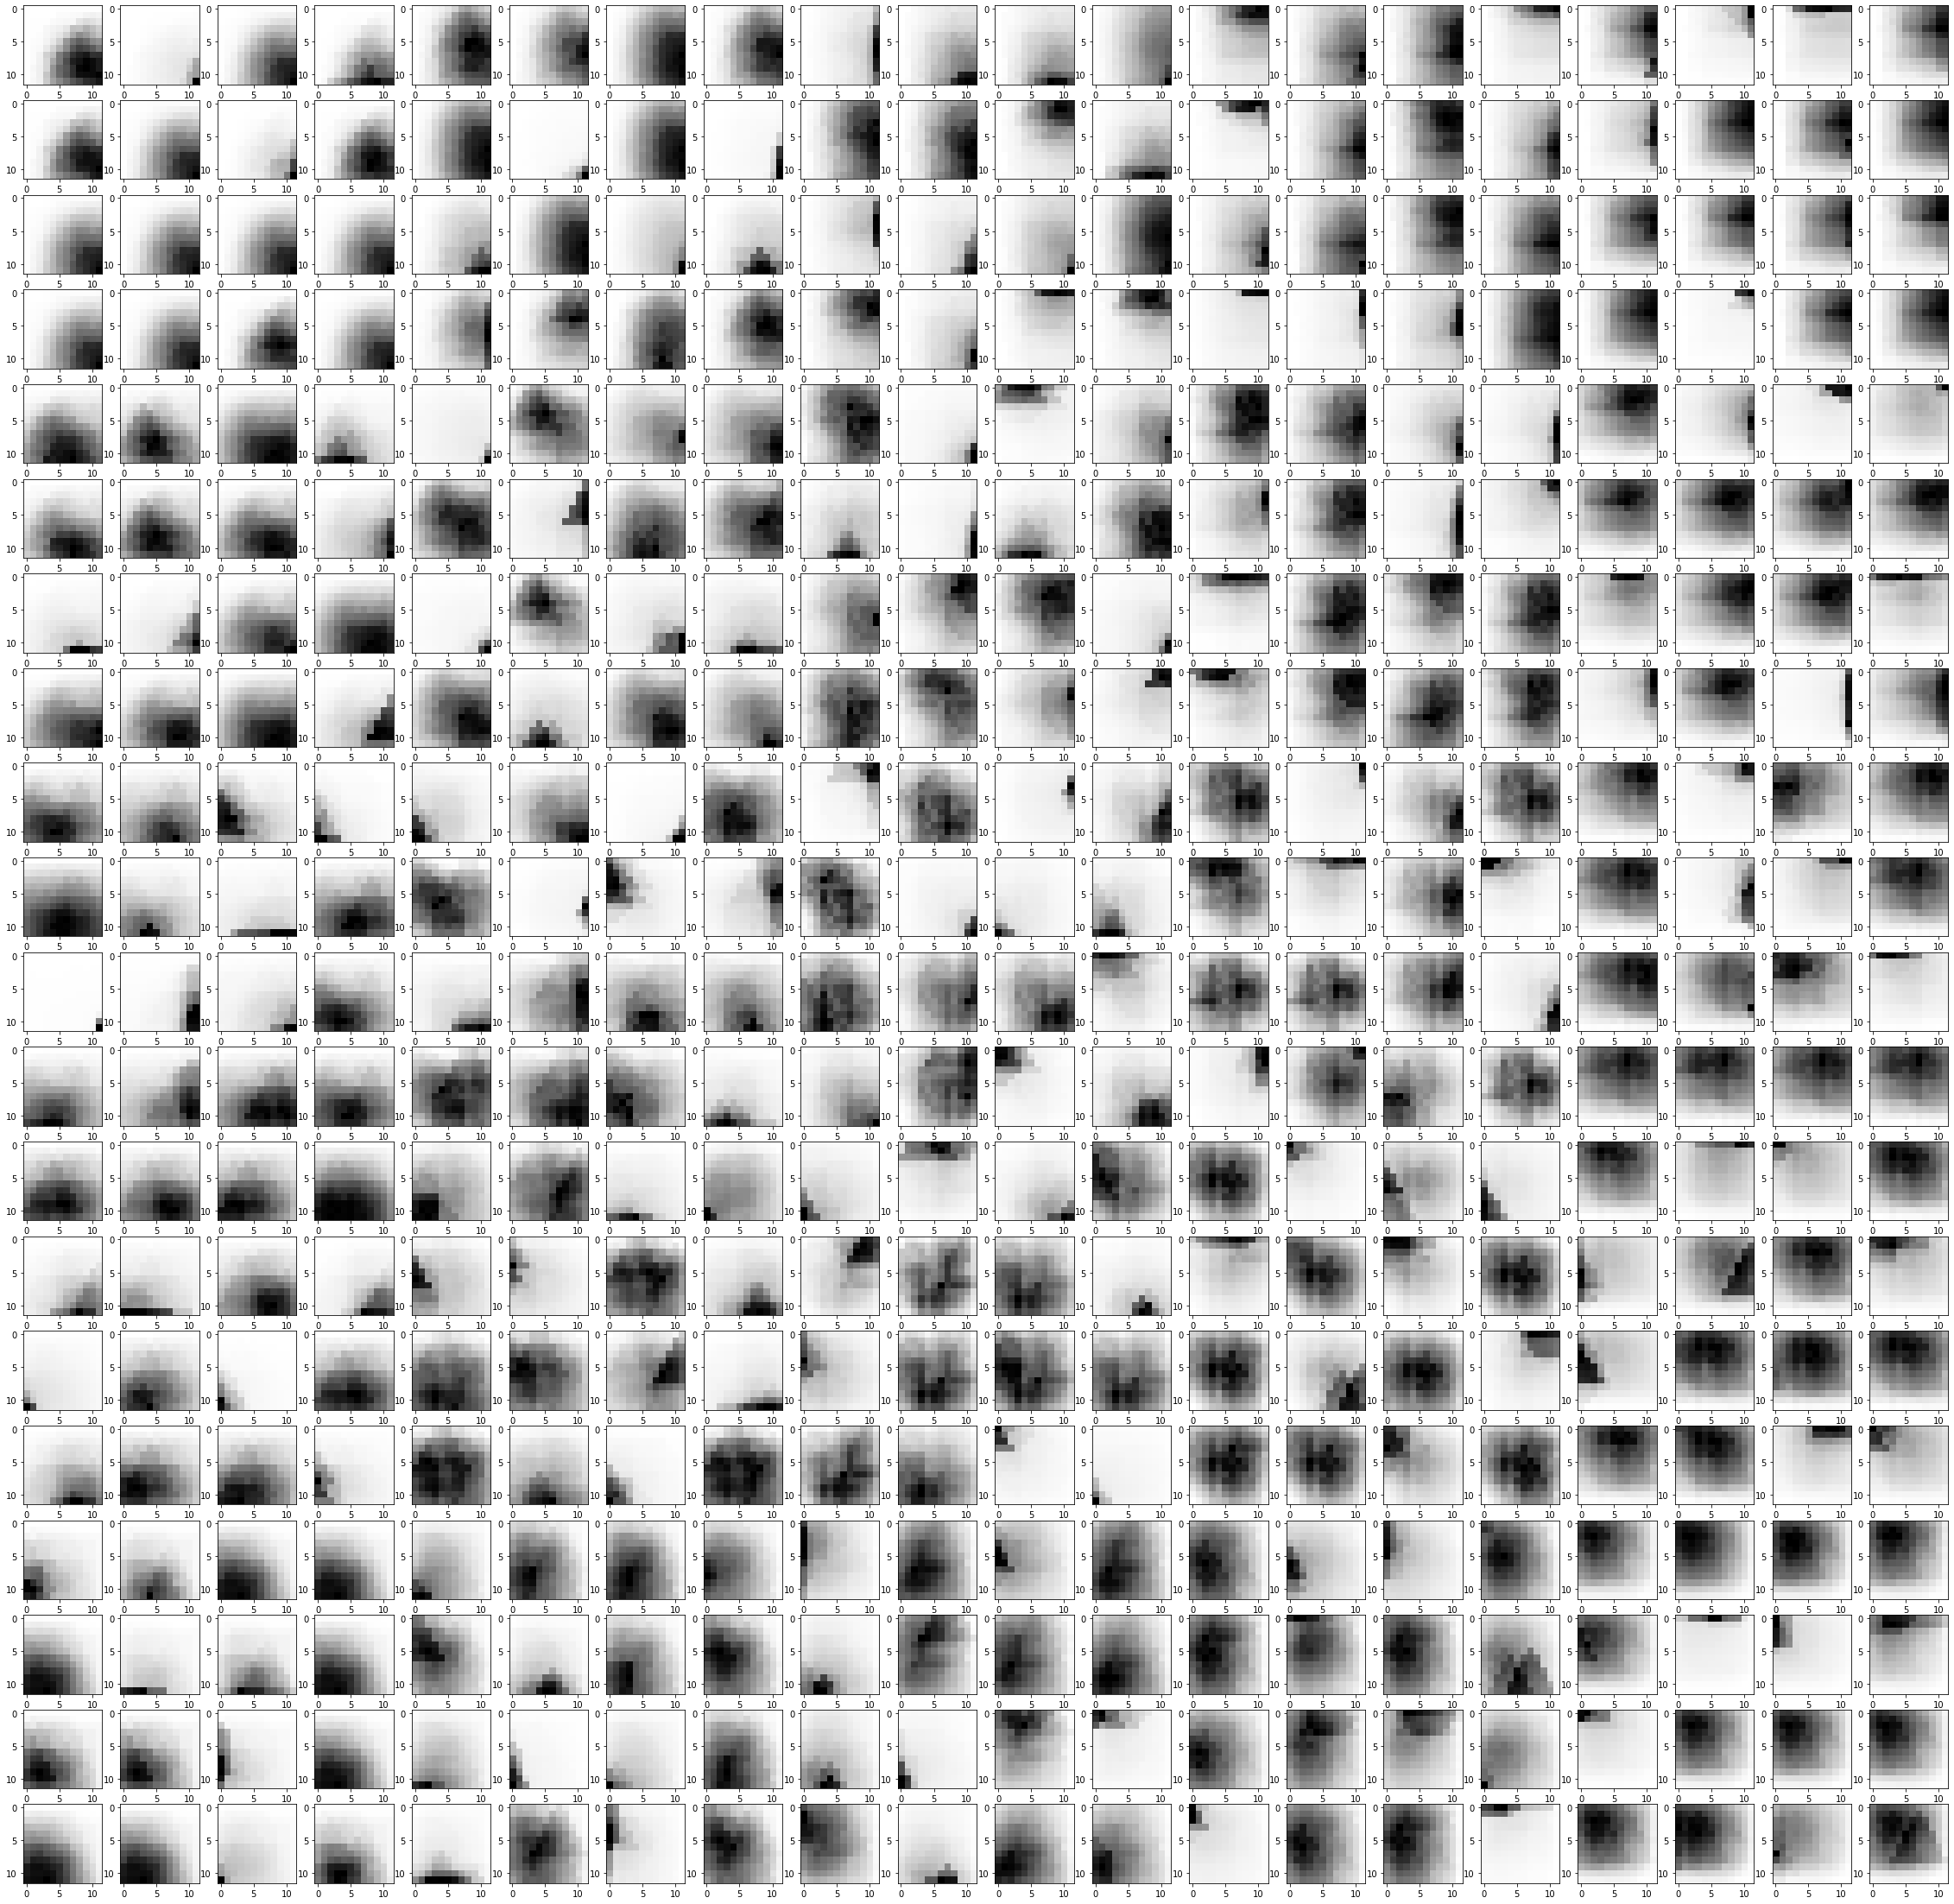

In [310]:
fig = plt.figure(figsize = (40,40))
for j in range(5):
    for k in range(5):
        for i in range(16):
            fig.add_subplot(20,20,4*j + 80*k + 20*int(i/4) + i%4 +1)
            plt.imshow((W_yF[j,k,i,:].cpu().numpy()).reshape(12,12),cmap='Greys')
plt.savefig('Shape_Wy')

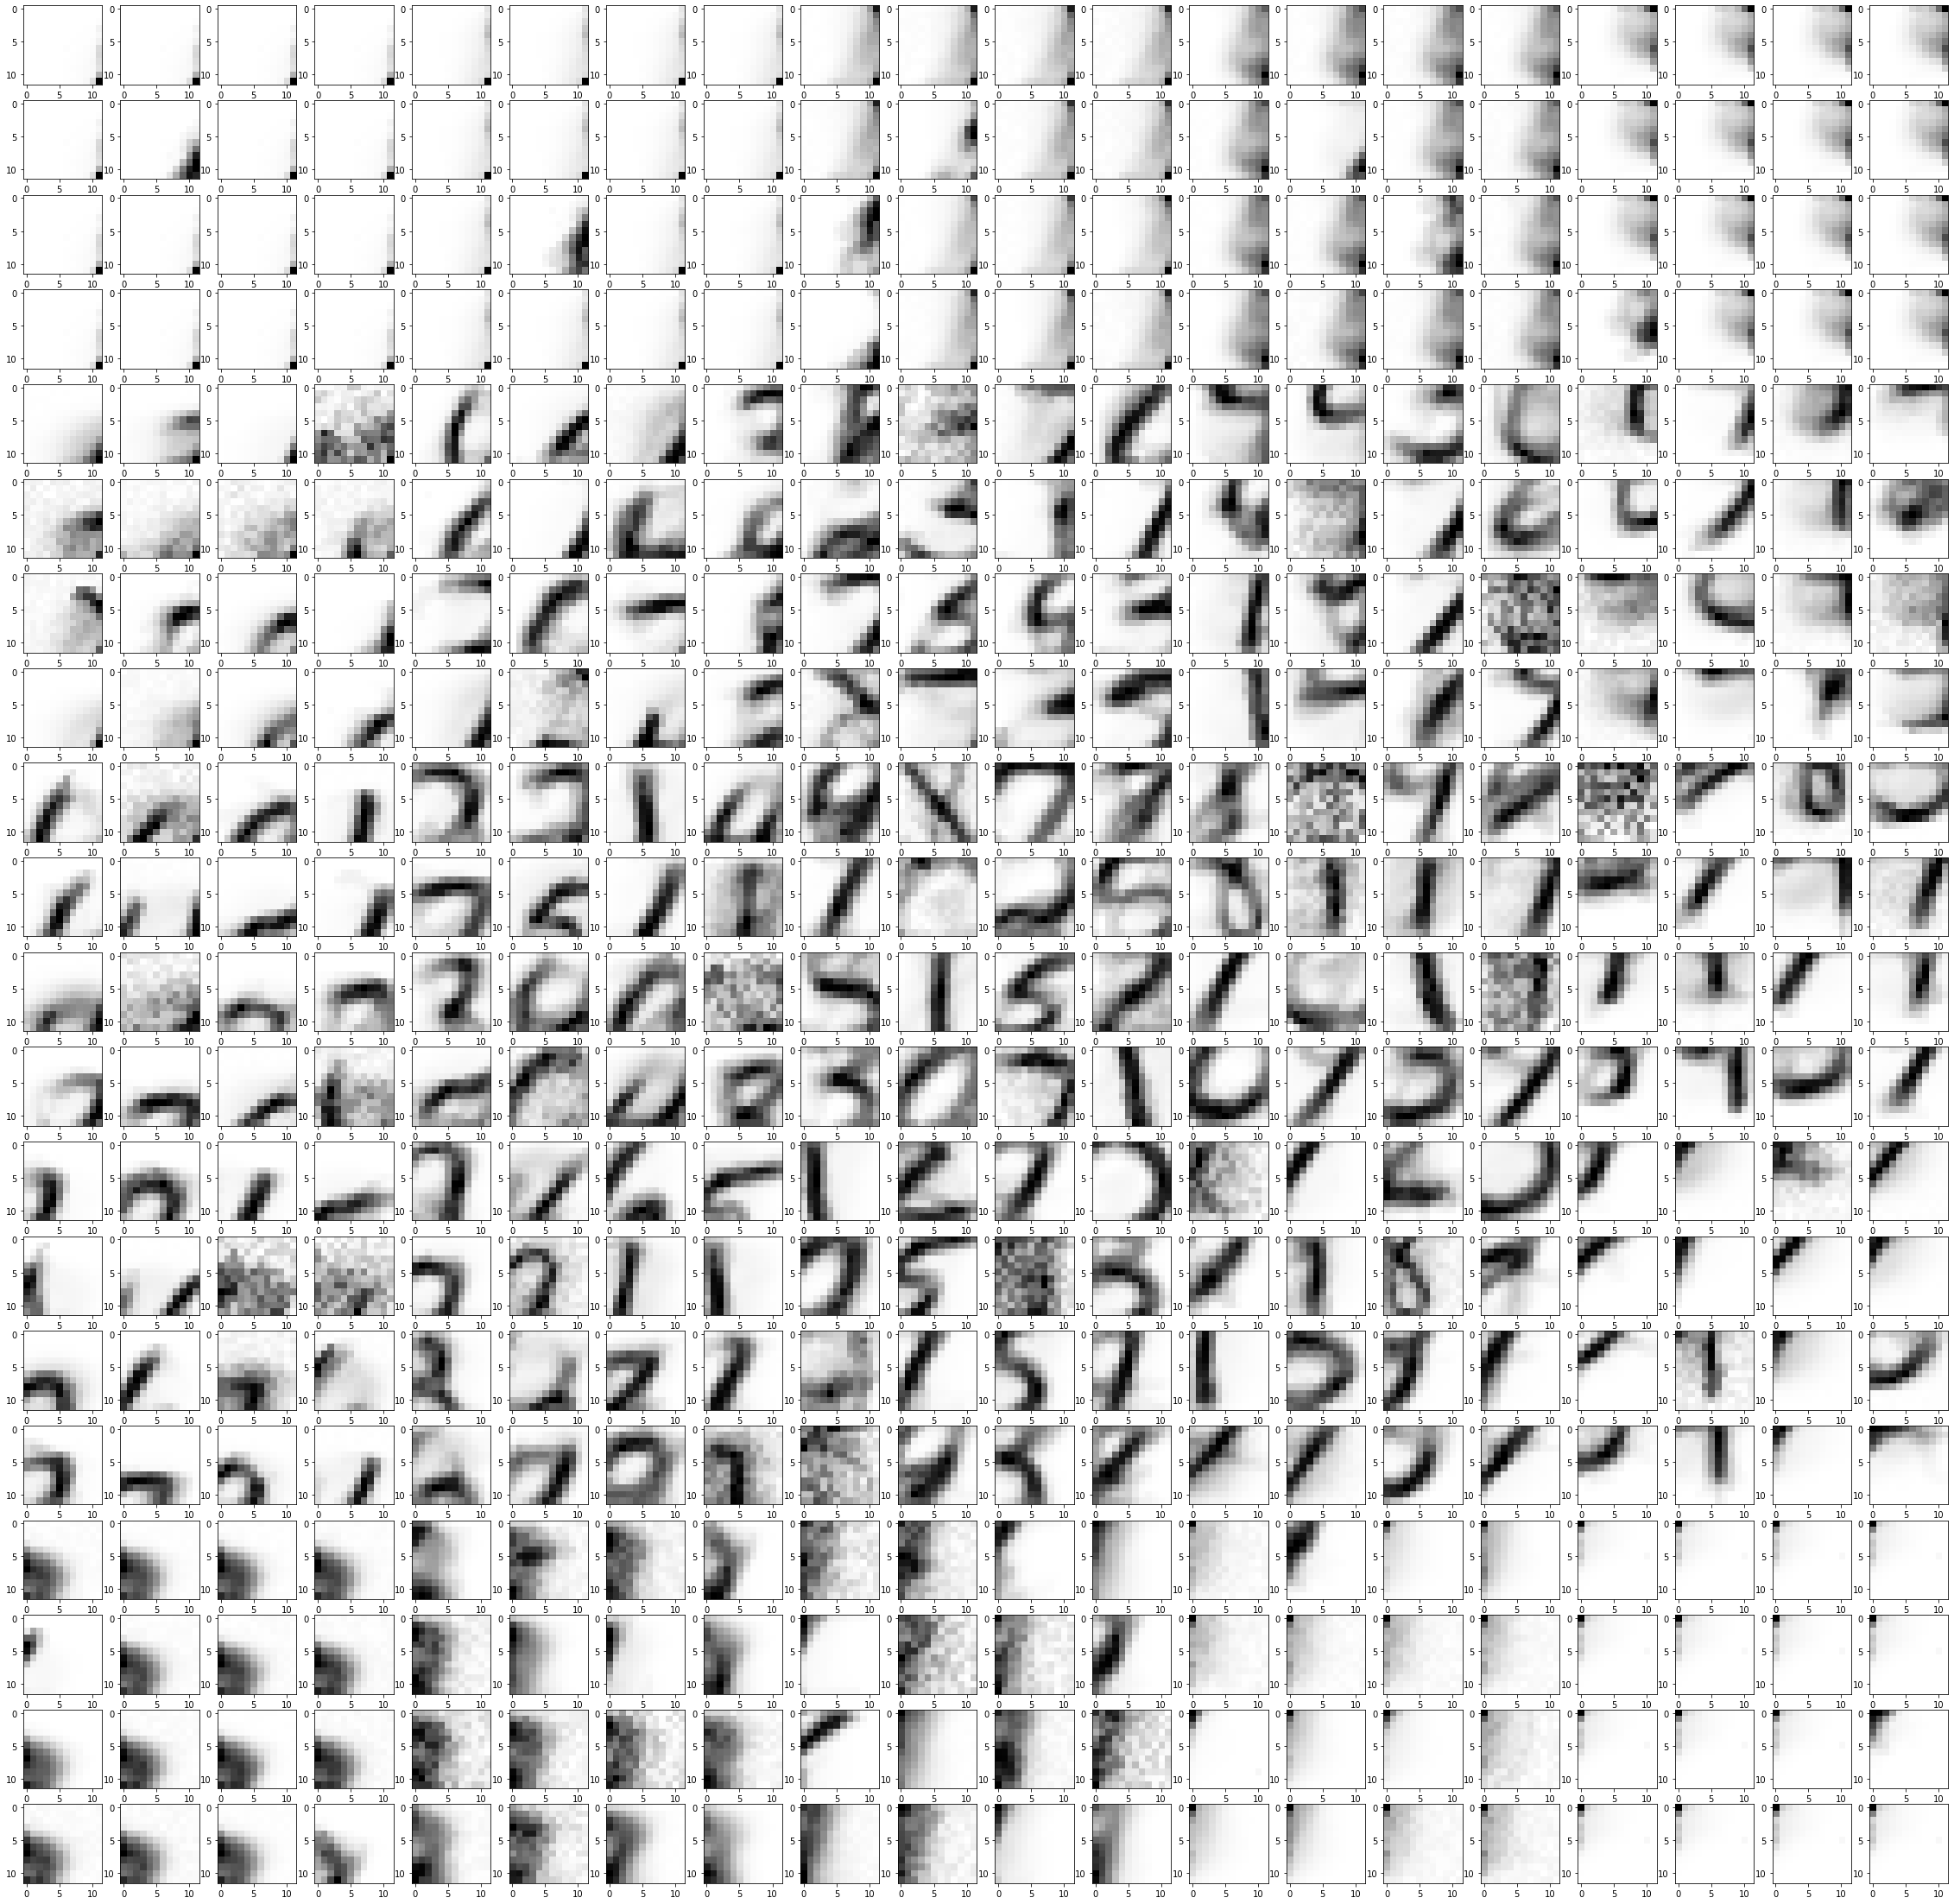

In [217]:
fig = plt.figure(figsize = (40,40))
for j in range(5):
    for k in range(5):
        for i in range(16):
            fig.add_subplot(20,20,4*j + 80*k + 20*int(i/4) + i%4 +1)
            plt.imshow((W_yF[j,k,i,:].cpu().numpy()).reshape(12,12),cmap='Greys')
plt.savefig('MNIST_Wy')

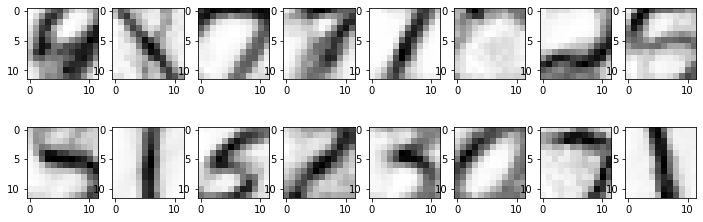

In [169]:
fig = plt.figure(figsize = (12,4))
for i in range(16):
    fig.add_subplot(2,8,i+1)
    plt.imshow((W_yF[2,2,i,:].cpu().numpy()).reshape(12,12),cmap='Greys')

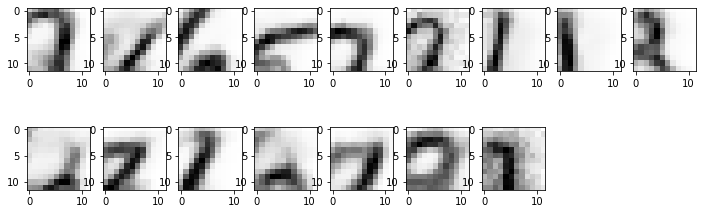

In [170]:
fig = plt.figure(figsize = (12,4))
for i in range(16):
    fig.add_subplot(2,9,i+1)
    plt.imshow((W_yF[1,3,i,:].cpu().numpy()).reshape(12,12),cmap='Greys')

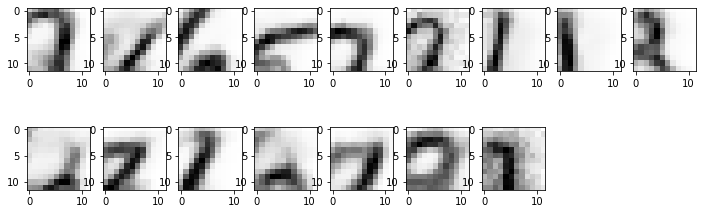

In [171]:
fig = plt.figure(figsize = (12,4))
for i in range(16):
    fig.add_subplot(2,9,i+1)
    plt.imshow((W_yF[1,3,i,:].cpu().numpy()).reshape(12,12),cmap='Greys')

In [225]:
def visZ(DAE, x, a,b,ix,k=1):
    '''Visualize higher layer weight matrices. For each "point" in the RF of a neuron, will visualize the lower layer's RF's.
    (a,b) are the Cartesian coordinates, while ix denotes the depth
    '''
    N,n1,d1,n2,d2,n3,d3, alpha, beta, gamma, eta, theta, p, S1, S2, S3, h = DAE.print_parms().values()
    L1_dim = int((N+S1-n1)/S1) #one-sided: number of units
    L2_dim = int((L1_dim + S2 - n2)/S2)
    y,W_y,Q,t,z,W_z,z_bar,v,W_v,v_bar = x
    
    fig = plt.figure(figsize = (8,8))
    WZ = W_z[a,b,ix].reshape(n2,n2,d1)
    for i in range(n2):
        for j in range(n2):
            _,idx = torch.sort(WZ[i,j,:], descending = True)
            fig.add_subplot(n2,n2,n2*i + j + 1)
            plt.imshow((1/k*W_y[(S2*a+i), (S2*b+j), idx[:k],:]).sum(dim = 0).reshape(n1,n1).cpu().numpy(), cmap = 'Greys')
            
    return fig

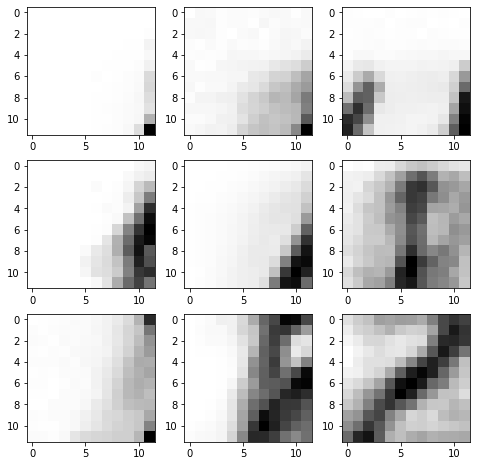

<Figure size 432x288 with 0 Axes>

In [219]:
tFig = plt.figure()
fig.add_subplot(1,2,1)
hold

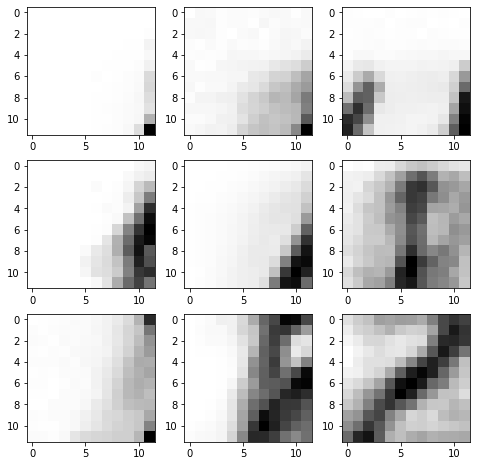

In [198]:
hold2 = visZ(main, x_final, 0,0,13,1)
# plt.savefig('W_zVisualAgg2')

In [ ]:
a,b = 0,1
k=3

In [ ]:
WZ = W_z[a,b,ix].reshape(n2,n2,d1)


In [ ]:
_,idx = torch.sort(WZ[i,j,:], descending = True)


In [ ]:
(1/k*W_y[(S2*a+i), (S2*b+j), idx[:k],:]).shape

In [ ]:
N,n1,d1,n2,d2,n3,d3, alpha, beta, gamma, eta, theta, p, S1, S2, S3, h = main.print_parms().values()
L1_dim = int((N+S1-n1)/S1) #one-sided: number of units
L2_dim = int((L1_dim + S2 - n2)/S2)
y,W_y,Q,t,z,W_z,z_bar,v,W_v,v_bar = x_final2

fig = plt.figure(figsize = (10,10))
WZ = W_z[a,b,ix].reshape(n2,n2,d1)
for i in range(n2):
    for j in range(n2):
        _,ix = torch.sort(WZ[i,j,:], descending = True)
        fig.add_subplot(n2,n2,n2*i + j + 1)
        plt.imshow(1/k*W_y[(S2*a+i), (S2*b+j), ix[:k],:].sum().reshape(n1,n1).cpu().numpy(), cmap = 'Greys')


In [227]:
W_yF.shape

torch.Size([5, 5, 16, 144])

In [238]:
def visZ2(DAE, x, a,b,ix,k=1):
    '''Visualize higher layer weight matrices. For each "point" in the RF of a neuron, will visualize the lower layer's RF's.
    (a,b) are the Cartesian coordinates, while ix denotes the depth
    '''
    N,n1,d1,n2,d2,n3,d3, alpha, beta, gamma, eta, theta, p, S1, S2, S3, h = DAE.print_parms().values()
    L1_dim = int((N+S1-n1)/S1) #one-sided: number of units
    L2_dim = int((L1_dim + S2 - n2)/S2)
    y,W_y,Q,t,z,W_z,z_bar,v,W_v,v_bar = x
    
    fig = plt.figure(figsize = (8,8))
    WZ = W_z[a,b,ix].reshape(n2,n2,d1)
    for i in range(n2):
        for j in range(n2):
            _,idx = torch.sort(WZ[i,j,:], descending = True)
            fig.add_subplot(n2,n2,n2*i + j + 1)
            plt.imshow((1/k*W_y[(S2*a+i), (S2*b+j), idx[:k],:]).sum(dim = 0).reshape(n1,n1).cpu().numpy(), cmap = 'Greys')
            
    return

In [249]:
W_zF.shape

torch.Size([3, 3, 16, 144])

In [252]:
def visZ(DAE, x, a,b,ix):
    '''Visualize higher layer weight matrices. For each "point" in the RF of a neuron, will visualize the lower layer's RF's.
    (a,b) are the Cartesian coordinates, while ix denotes the depth
    '''
    N,n1,d1,n2,d2,n3,d3, alpha, beta, gamma, eta, theta, p, S1, S2, S3, h = DAE.print_parms().values()
    L1_dim = int((N+S1-n1)/S1) #one-sided: number of units
    L2_dim = int((L1_dim + S2 - n2)/S2)
    y,W_y,Q,t,z,W_z,z_bar,v,W_v,v_bar = x
    
    fig = plt.figure(figsize = (10,10))
    WZ = W_z[a,b,ix].reshape(n2,n2,d1)
    for i in range(n2):
        for j in range(n2):
            max_ix = torch.argmax(WZ[i,j,:])
            fig.add_subplot(n2,n2,n2*i + j + 1)
            plt.imshow(W_y[(S2*a+i), (S2*b+j), max_ix,:].reshape(n1,n1).cpu().numpy(), cmap = 'Greys')
            
    return 

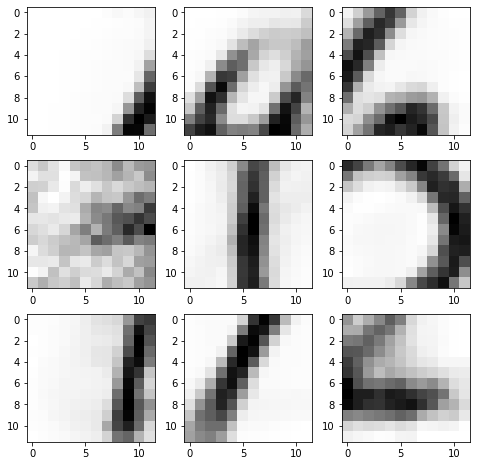

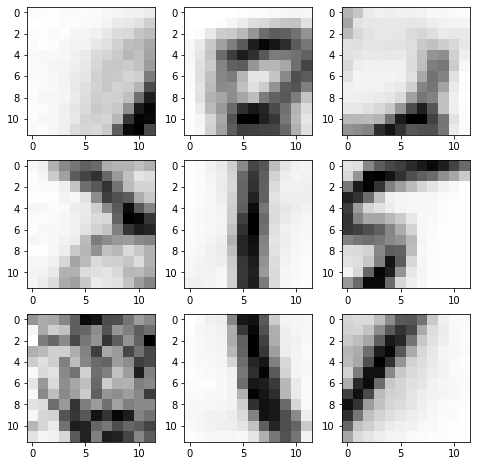

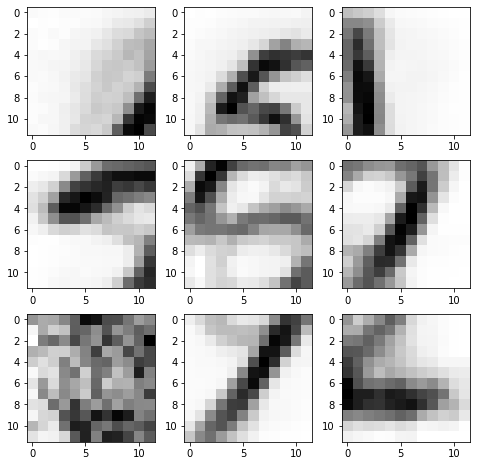

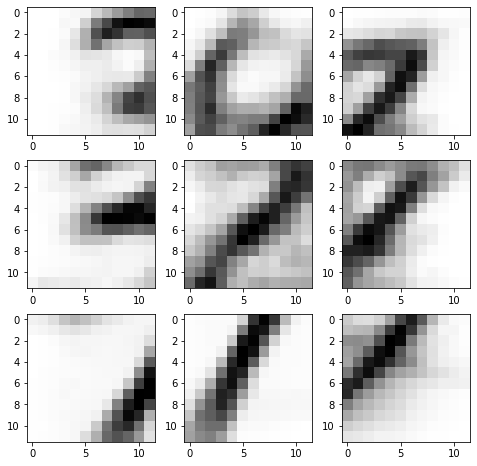

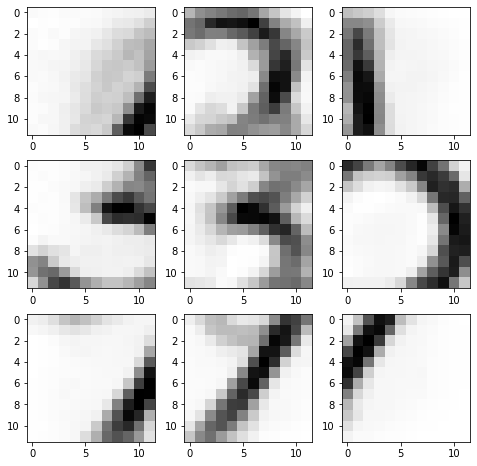

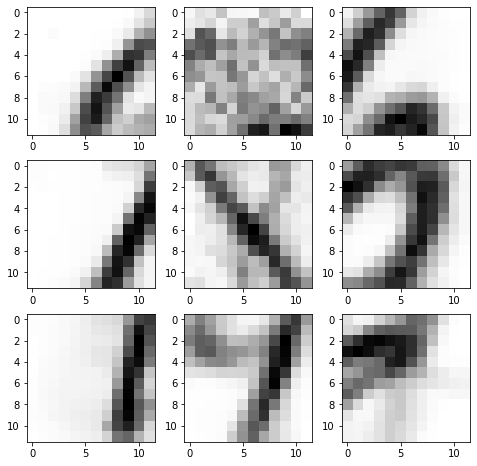

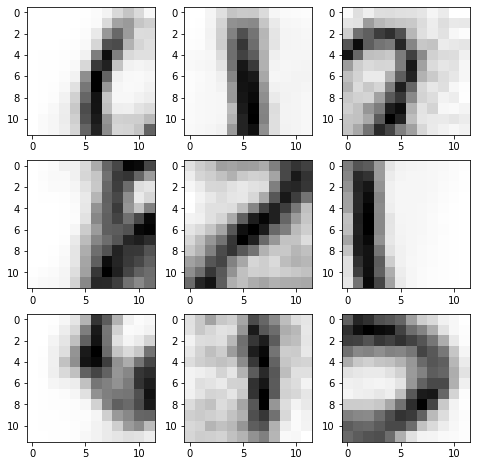

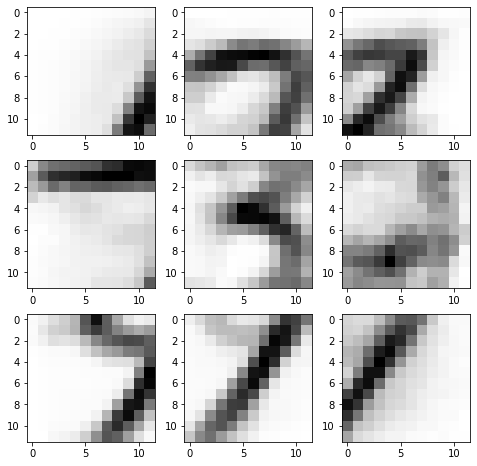

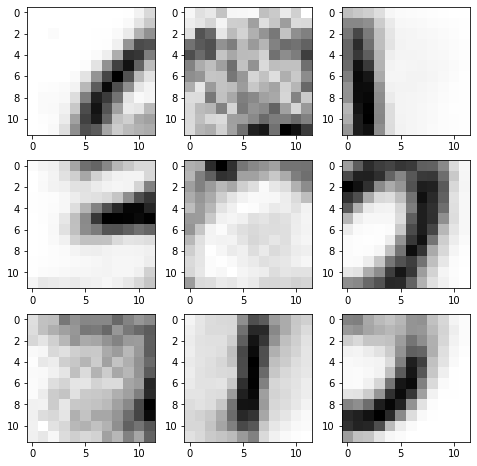

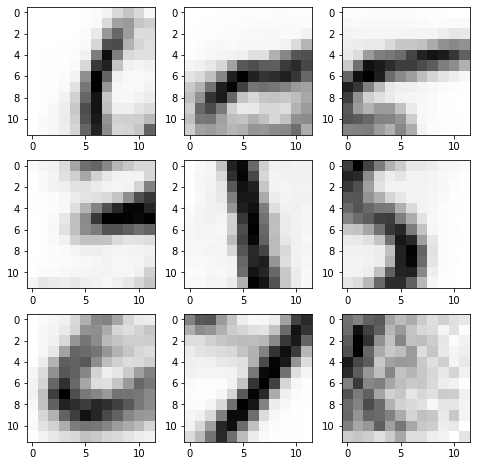

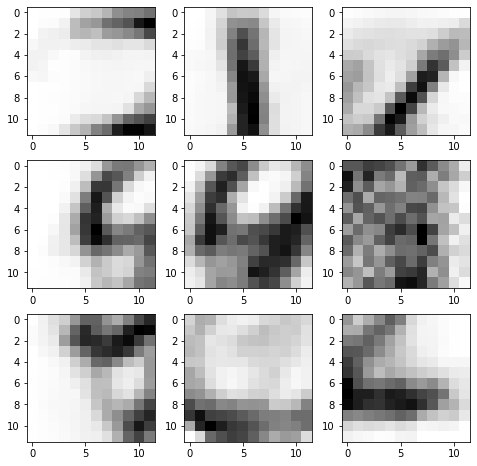

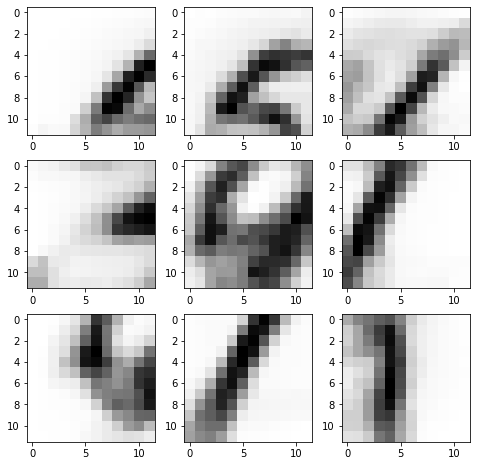

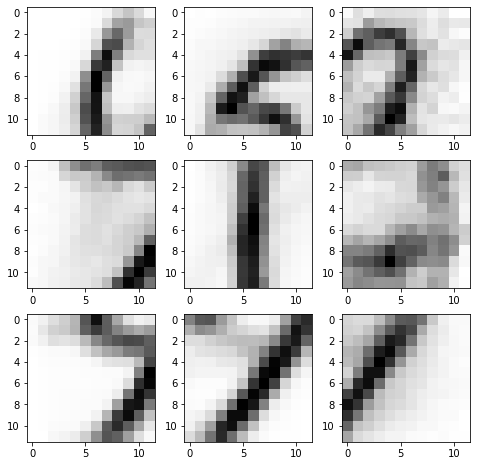

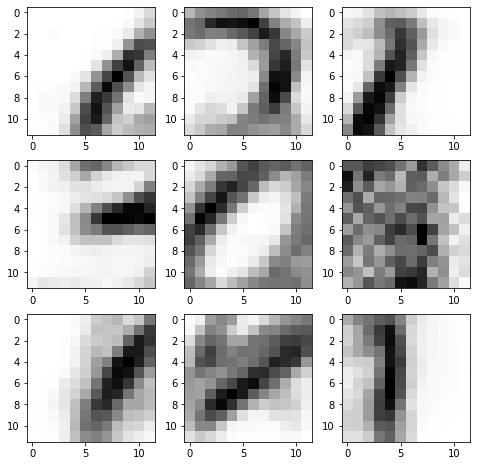

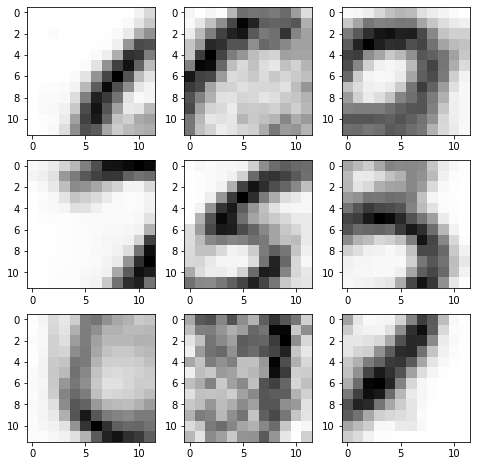

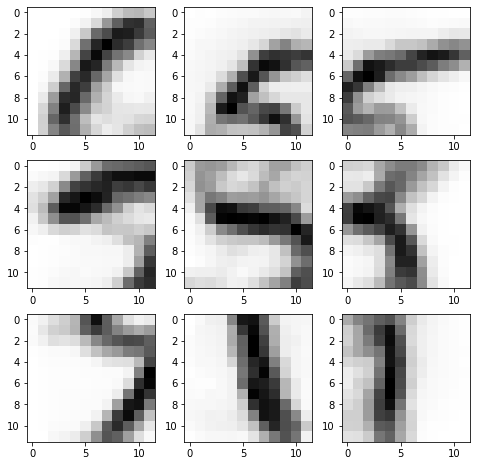

In [272]:
for depth in range(16): 
    visZ2(main, x_final, 1,1,depth,1)

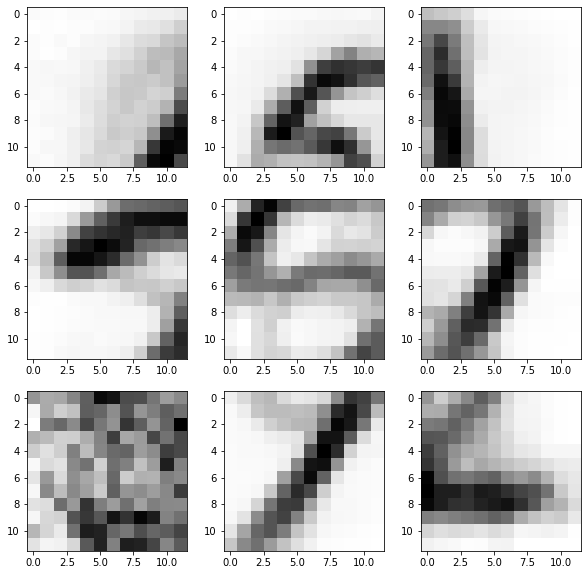

In [254]:
visZ(main, x_final, 1,1,2)
# plt.savefig('W_zVisual1_neighbor')

In [ ]:
fig2, ax2 = plt.subplots(3,3)

In [ ]:
ax2[9]

In [ ]:
testW[1,1,:]

In [ ]:
fig = plt.figure(figsize = (12,4))
for i in range(16):
    fig.add_subplot(2,8,i+1)
    plt.imshow((W_yF[1,1,i,:].cpu().numpy()).reshape(12,12),cmap='Greys')

In [ ]:
visZ(main, x_final2, 1,1,3)

In [ ]:
visZ(main, x_final2, 1,1,3)

In [ ]:
fig = plt.figure(figsize = (12,4))
for i in range(16):
    fig.add_subplot(2,8,i+1)
    plt.imshow((W_yF[2,2,i,:].cpu().numpy()).reshape(12,12),cmap='Greys')

In [ ]:
importlib.reload(fe)

In [ ]:
main = fe.FE_V1()
main.summary()

In [138]:
T = 120
xtest = main.x_init()
# y,W_y,Q,t,z,W_z,z_bar,v,W_v,v_bar = xtest
yhold = torch.zeros_like(y).repeat(T,1,1,1)
for i in range(T):
    xtest = FE_solve(main, .05, 0, xtest, mov2u(data_mov[2]), Reset = 0,W_y = W_yF, Q = QF, t = tF, W_z = W_zF,W_v = W_vF)
    y,W_y,Q,t,z,W_z,z_bar,v,W_v,v_bar = xtest
    yhold[i,:,:,:] = y

In [139]:
yhold[T-1,:,:,:]

tensor([[[3.2258e-02, 3.2258e-02, 3.2258e-02, 3.2258e-02, 3.2258e-02,
          3.2258e-02, 3.2258e-02, 3.2258e-02, 3.2258e-02, 3.2258e-02,
          3.2258e-02, 3.2258e-02, 3.2258e-02, 3.2258e-02, 3.2258e-02,
          3.2258e-02],
         [3.2258e-02, 3.2258e-02, 3.2258e-02, 3.2258e-02, 3.2258e-02,
          3.2258e-02, 3.2258e-02, 3.2258e-02, 3.2258e-02, 3.2258e-02,
          3.2258e-02, 3.2258e-02, 3.2258e-02, 3.2258e-02, 3.2258e-02,
          3.2258e-02],
         [3.2258e-02, 3.2258e-02, 3.2258e-02, 3.2258e-02, 3.2258e-02,
          3.2258e-02, 3.2258e-02, 3.2258e-02, 3.2258e-02, 3.2258e-02,
          3.2258e-02, 3.2258e-02, 3.2258e-02, 3.2258e-02, 3.2258e-02,
          3.2258e-02],
         [1.5681e-04, 6.7104e-05, 8.9710e-05, 6.9136e-05, 2.7381e-03,
          5.7447e-01, 1.0384e-04, 1.9338e-01, 8.3077e-05, 1.0319e-04,
          2.0405e-03, 1.4643e-04, 7.7420e-05, 1.1668e-02, 6.8030e-05,
          5.7101e-02],
         [4.8417e-03, 9.3991e-05, 7.4142e-05, 7.7632e-05, 3.1160e-02

In [ ]:
z[2,2,:]

In [ ]:
importlib.reload(fe)

In [ ]:
main = fe.FE_V1()
main.summary()
xtest = main.x_init()
y,W_y,Q,t,z,W_z,z_bar,v,W_v,v_bar = x
xtest = FE_movie(main,data_mov[3], 1, W_y = W_yF, Q = QF, t = tF, W_z = W_zF,W_v = W_vF)
y,W_y,Q,t,z,W_z,z_bar,v,W_v,v_bar = xtest

In [ ]:
N,n1,d1,n2,d2,n3,d3, alpha, beta, gamma, eta, theta, p, S1, S2, S3, h = main.print_parms().values()
L1_dim = int((N+S1-n1)/S1) #one-sided: number of units
L2_dim = int((L1_dim + S2 - n2)/S2)
WZ = W_z.reshape(L2_dim,L2_dim, d2, n2,n2,d1)


In [ ]:
fig = plt.figure(figsize = (10,5))
for i in range(mov_len):
    fig.add_subplot(1,mov_len,i+1)
    plt.imshow(data_mov[3,i,:,:].cpu().numpy(),cmap='Greys')

In [ ]:
y[0,0,:]

In [ ]:
z

In [ ]:
W_zF